In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import string
import operator
import pandas as pd
import numpy as np
import seaborn as sns

from collections import Counter
from functools import reduce

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from probability.experiment import Experiment

In [2]:
ACCEPT_LETTERS = string.ascii_lowercase + ' '
FILE = './brazilian_tales_2017_1/LIFE_by_JM_Machado_de_Assis.txt'

ACCEPT_LETTERS, FILE

('abcdefghijklmnopqrstuvwxyz ',
 './brazilian_tales_2017_1/LIFE_by_JM_Machado_de_Assis.txt')

# Questão 1

## a) Calculate and plot the probability distribution $P(x)$ over the 27 letters $x$.


In [3]:
import operator
from functools import reduce
import re

def read_file(file):
    with open(file, 'r') as f:
        regex = r'[^{}]'.format(ACCEPT_LETTERS)
        return re.sub(regex, '', f.read().lower())

text = read_file(FILE)
text[:250]

'lifeby joaquim maria machado de assis    end of time ahasverus seated upon a rock gazes for a long while    upon the horizon athwart which wing two eagles crossing each    other in their path he meditates then falls into a doze the day    wanesahasve'

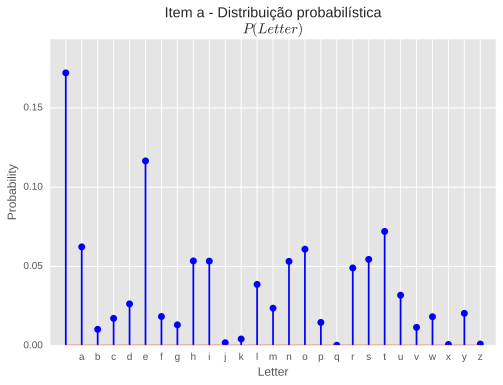

In [4]:
def distribuicao_probabilistica(file):
    return Experiment.from_counter(Counter(file), 'Letter').calcule()

P = distribuicao_probabilistica(text)

plt = P.plot()
plt.title('Item a - Distribuição probabilística\n{}'.format(plt.axes().get_title()))
plt.show()

## b) Calculate and plot the probability distribution $P(x, y)$ over the $27 x 27$ possible (ordered) bi-grams $xy$. Note: For this joint distribution, its two marginals $P(x)$ and $P(y)$ are identical.

In [5]:
def distribuicao_probabilistica_digrafo(text):
    counter = Counter(zip(text[0:-1], text[1:]))
    
    return Experiment.from_counter(counter, ('X', 'Y')).calcule()

P = distribuicao_probabilistica_digrafo(text)
P.to_dataframe().head()

Y,,a,b,c,d,e,f,g,h,i,...,q,r,s,t,u,v,w,x,y,z
X,,,,,,,,,,,,,,,,,,,,,
,0.001591,0.016049,0.007402,0.006295,0.006433,0.005327,0.004635,0.002767,0.007540,0.013005,...,0.000000,0.003390,0.008716,0.026978,0.001799,0.000899,0.011898,0.0,0.008232,0.000138
a,0.002836,0.000000,0.001176,0.001453,0.001314,0.000208,0.000415,0.001591,0.003251,0.001591,...,0.000069,0.006018,0.007748,0.007471,0.000692,0.002490,0.000899,0.0,0.001660,0.000346
b,0.000138,0.000277,0.000000,0.000000,0.000000,0.004635,0.000000,0.000000,0.000069,0.000138,...,0.000000,0.000553,0.000069,0.000069,0.001937,0.000000,0.000000,0.0,0.000277,0.000000
c,0.000208,0.002144,0.000000,0.000000,0.000000,0.003390,0.000000,0.000000,0.002975,0.001038,...,0.000000,0.001591,0.000069,0.001245,0.000553,0.000000,0.000000,0.0,0.000000,0.000000
d,0.013835,0.001453,0.000138,0.000000,0.000138,0.004220,0.000000,0.000000,0.000069,0.002490,...,0.000000,0.000415,0.000968,0.000069,0.000069,0.000000,0.000208,0.0,0.000277,0.000000


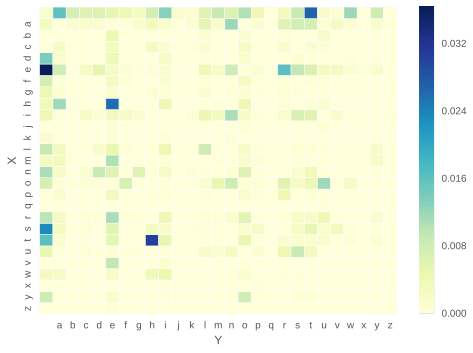

In [6]:
P.plot()

## c) From this joint distribution, calculate and plot the conditional distribution: 

### $i)$ $P(y\ |\ x)$, the conditional distribution of the second letter $y$, given the fist letter $x$;

In [7]:
X, Y = P.variables

P(Y | X).to_dataframe().head()

X,,a,b,c,d,e,f,g,h,i,...,q,r,s,t,u,v,w,x,y,z
Y,,,,,,,,,,,,,,,,,,,,,
,0.009244,0.045505,0.013423,0.012048,0.524934,0.312166,0.406015,0.336842,0.073834,0.081712,...,0.0,0.197461,0.425667,0.224568,0.158696,0.000000,0.159091,0.000000,0.40000,0.0
a,0.093248,0.000000,0.026846,0.124498,0.055118,0.069436,0.045113,0.068421,0.220207,0.009079,...,0.0,0.053597,0.050826,0.019194,0.008696,0.023952,0.125000,0.000000,0.00339,0.0
b,0.043006,0.018868,0.000000,0.000000,0.005249,0.002374,0.000000,0.000000,0.000000,0.002594,...,0.0,0.001410,0.001271,0.000960,0.004348,0.000000,0.000000,0.000000,0.00339,0.0
c,0.036576,0.023307,0.000000,0.000000,0.000000,0.022552,0.003759,0.000000,0.001295,0.040208,...,0.0,0.011283,0.012706,0.002879,0.019565,0.000000,0.000000,0.181818,0.00000,0.0
d,0.037379,0.021088,0.000000,0.000000,0.005249,0.046884,0.000000,0.000000,0.000000,0.018158,...,0.0,0.012694,0.000000,0.001919,0.010870,0.000000,0.000000,0.000000,0.00000,0.0


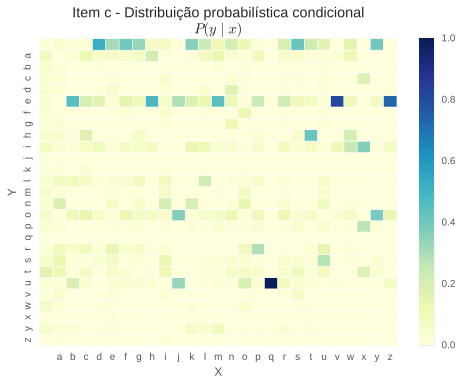

In [8]:
axes = P(Y | X).plot()
axes.set_title('Item c - Distribuição probabilística condicional\n$P(y\ |\ x)$')

### $ii)$ $P(x\ |\ y)$, the conditional distribution of the first letter $x$, given the second letter $y$.

In [9]:
P(X | Y).to_dataframe().head()

Y,,a,b,c,d,e,f,g,h,i,...,q,r,s,t,u,v,w,x,y,z
X,,,,,,,,,,,,,,,,,,,,,
,0.009244,0.257492,0.718121,0.365462,0.244094,0.045697,0.251880,0.210526,0.141009,0.243839,...,0.00,0.069111,0.160102,0.374280,0.056522,0.077844,0.651515,0.0,0.403390,0.133333
a,0.016479,0.000000,0.114094,0.084337,0.049869,0.001780,0.022556,0.121053,0.060802,0.029831,...,0.25,0.122708,0.142313,0.103647,0.021739,0.215569,0.049242,0.0,0.081356,0.333333
b,0.000804,0.004440,0.000000,0.000000,0.000000,0.039763,0.000000,0.000000,0.001294,0.002594,...,0.00,0.011283,0.001271,0.000960,0.060870,0.000000,0.000000,0.0,0.013559,0.000000
c,0.001206,0.034406,0.000000,0.000000,0.000000,0.029080,0.000000,0.000000,0.055627,0.019455,...,0.00,0.032440,0.001271,0.017274,0.017391,0.000000,0.000000,0.0,0.000000,0.000000
d,0.080386,0.023307,0.013423,0.000000,0.005249,0.036202,0.000000,0.000000,0.001294,0.046693,...,0.00,0.008463,0.017789,0.000960,0.002174,0.000000,0.011364,0.0,0.013559,0.000000


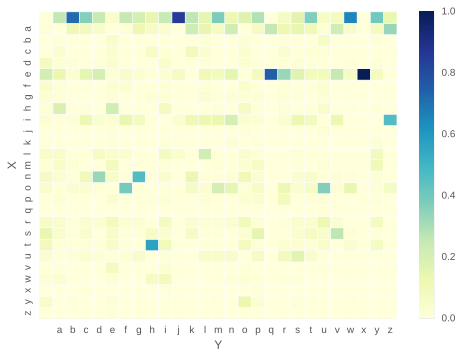

In [10]:
P(X | Y).plot()